<a href="https://colab.research.google.com/github/sebastianSbg/IML-projects/blob/master/Project_1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating RSME of ridge regression with different penalties

In [1]:
# Performing ridge regression on a dataset & evaluatings RMSE for each lambda chosen
# Created by Sebastian Bommer 2020-05-17
# Modified by Sebastian Bommer 2021-03-09

## defining libraries and mounting drive

In [8]:
# importing libraries
import pandas as pd
import sklearn
import numpy as np

In [9]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading in data

In [10]:
# loading data - CHANGE TO YOUR BASE DIRECTORY
dir = '/content/drive/MyDrive/Colab Notebooks/IML/Project1_a/data/train.csv'

D = pd.read_csv(dir)

X_df = D.iloc[:,1:-1]
y_df = D.iloc[:,0]

X = np.array(X_df)
y = np.array(y_df)

D.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,22.6,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
1,50.0,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
2,23.0,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
3,8.3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
4,21.2,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


# Creating k-fold split

In [11]:
from sklearn.model_selection import KFold

# hyper parameter
n_fold = 10

kf = KFold(n_fold, shuffle=False)

ind = np.arange(y.shape[0])

ind_splits = list(kf.split(ind))

In [12]:
X[ind_splits[0][0],:]

array([[5.56100e-02, 7.00000e+01, 2.24000e+00, ..., 3.58000e+02,
        1.48000e+01, 3.71580e+02],
       [5.82401e+00, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 3.96900e+02],
       [4.01100e-02, 8.00000e+01, 1.52000e+00, ..., 3.29000e+02,
        1.26000e+01, 3.96900e+02],
       ...,
       [6.90500e-02, 0.00000e+00, 2.18000e+00, ..., 2.22000e+02,
        1.87000e+01, 3.96900e+02],
       [7.36711e+00, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 9.67300e+01],
       [1.68118e+01, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 3.96900e+02]])

# Train ridge regression

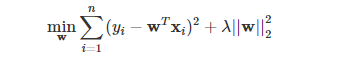



In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lam = [0.1, 1, 10, 100, 200]

errors = []
for alph in lam:

  clf = Ridge(alpha=alph,solver='cholesky')

  errorVec = []
  for i in range(len(ind_splits)):
    print(f'Training on {i} fold and lambda {alph}')
    model = clf.fit(X[ind_splits[i][0],:], y[ind_splits[i][0]])
    y_pred = model.predict(X[ind_splits[i][1],:])

    errorVec.append(np.sqrt(mean_squared_error(y_pred, y[ind_splits[i][1]])))
  errors.append(np.mean(errorVec))

print(f'The mean RMS errors are: {errors}')
    
#     # calculating the distance between actual & predicted y values
#     dist = np.array(y_pred - y[ind_splits[i][1]])    
#     dist_vec.append(np.dot(dist,dist))

#   print(dist_vec)
#   errors.append(np.sqrt(np.mean(dist_vec)))
  
# print(f'\nThe RMSE error is: {errors}')

Training on 0 fold and lambda 0.01
Training on 1 fold and lambda 0.01
Training on 2 fold and lambda 0.01
Training on 3 fold and lambda 0.01
Training on 4 fold and lambda 0.01
Training on 5 fold and lambda 0.01
Training on 6 fold and lambda 0.01
Training on 7 fold and lambda 0.01
Training on 8 fold and lambda 0.01
Training on 9 fold and lambda 0.01
Training on 0 fold and lambda 0.1
Training on 1 fold and lambda 0.1
Training on 2 fold and lambda 0.1
Training on 3 fold and lambda 0.1
Training on 4 fold and lambda 0.1
Training on 5 fold and lambda 0.1
Training on 6 fold and lambda 0.1
Training on 7 fold and lambda 0.1
Training on 8 fold and lambda 0.1
Training on 9 fold and lambda 0.1
Training on 0 fold and lambda 1
Training on 1 fold and lambda 1
Training on 2 fold and lambda 1
Training on 3 fold and lambda 1
Training on 4 fold and lambda 1
Training on 5 fold and lambda 1
Training on 6 fold and lambda 1
Training on 7 fold and lambda 1
Training on 8 fold and lambda 1
Training on 9 fold and

# Exporting to csv

In [25]:
errors_df = pd.DataFrame(errors)
filePath = '/content/drive/MyDrive/Colab Notebooks/IML/Project1_a/results' + '/rmse_' + str(int(time.time())) +  '.csv'
errors_df.to_csv(filePath, index=False, float_format='%.3f',header=False)

In [17]:
errors_df

,0
0,6.122895
1,6.120551
2,6.178452
3,6.235984
4,6.788415
